<a href="https://colab.research.google.com/github/Hyunggilwoo/CSE422/blob/main/422_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cvxpy as cp
from PIL import Image

def count_ratio(letter):
  with open('/content/wonderland-tree.txt') as infile:
    lines=0
    words=0
    total_characters=0

    letter_count = 0

    for line in infile:
      wordslist=line.split()
      lines=lines+1
      words=words+len(wordslist)
      total_characters += sum(len(word) for word in wordslist)

      letter_count += sum(1 for char in line if char == letter)

  print(lines)
  print(words)
  print( letter_count / total_characters)

print(count_ratio('1'))

40
40
0.21
None


In [ ]:
r = 600
size = 1200

A = chosen_distribution(0.5)

pixels = []
with open('/content/wonderland-tree.txt', 'r') as file:
  for line in file:
    for char in line.strip():
      pixels.append(int(char))

x = np.array(pixels)
print(x)

[452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]


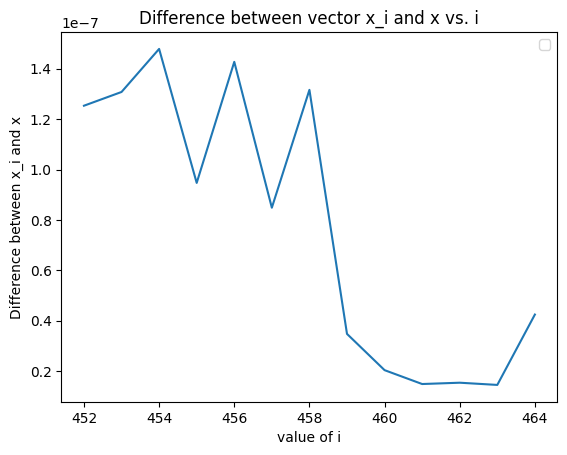

In [ ]:
# 1d) plotting a sharp drop off of the binary_search_norm, r* = 462

r_star = 460
plot_list = []
x_range = list(range(0.2, 1.2, 0.2))
print(x_range)

for i in enumerate(x_range):
  A = chosen_distribution(i)
  x_i = minimal_norm(A, x, i)
  plot = np.linalg.norm(x_i - x, ord=1)
  plot_list.append(plot)

plt.plot(x_range, plot_list)
plt.legend()
plt.title("Difference between vector x_i and x vs. i")
plt.xlabel('value of i')
plt.ylabel('Difference between x_i and x')
plt.show()


In [ ]:

A_r = A[:r, :] # slice of original array up to r rows
b_r = np.dot(A_r, x)

x_r = cp.Variable(size)

constraints = [x_r >=0, x_r <= 1, b_r == A_r @ x_r]

objective = cp.Minimize(cp.norm1(x_r))
problem = cp.Problem(objective, constraints)

problem.solve()

optimal_x = x_r.value

# reconstruct image
# plt.imshow(optimal_x.reshape((40, 30)))
# plt.show()

In [ ]:
print(np.allclose(x, optimal_x))

True


In [ ]:
np.linalg.norm(x - optimal_x, ord=1)

In [ ]:
minimal_norm(A, x, 600)

2.87193872077415e-09

In [ ]:
binary_search_norm(A, x)

462.01171875

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array


In [ ]:
# 1e) entries are chosen independently from the distribution
# -1 with probability p/2, +1 with probability p/2, 0 with probability 1 -p
size = 1200



values = [1, -1, 0]
matrix_shape = (size, size)

def distribution_probability(p):
  probabilities = [p/2, p/2, 1 - p]
  return probabilities

def chosen_distribution(per):
  chosen_values = np.random.choice(values, size = np.prod(matrix_shape), p = distribution_probability(per))
  matrix = chosen_values.reshape(matrix_shape)

  return matrix

In [ ]:

# size = 1200

A = chosen_distribution(0.5)

pixels = []
with open('/content/wonderland-tree.txt', 'r') as file:
  for line in file:
    for char in line.strip():
      pixels.append(int(char))

x = np.array(pixels)
print(x)


[0 0 0 ... 0 0 0]


In [ ]:
def minimal_norm(A, x, r):
  r = int(r)
  A_r = A[:r, :]
  b_r = np.dot(A_r, x)

  x_r = cp.Variable(size)

  constraints = [x_r >= 0, x_r <= 1, b_r == A_r @ x_r]

  objective = cp.Minimize(cp.norm1(x_r))
  problem = cp.Problem(objective, constraints)

  problem.solve()

  optimal_x = x_r.value
  # np.allclose(x, optimal_x)
  return  optimal_x

In [ ]:
# 1c) use binary search to identify the smallest r in which norm of | x - x_r | < 0.001
def binary_search_norm(A, x):
  '''
  Find the midpoint in which
  '''
  lower_bound = 0
  upper_bound = 600
  while upper_bound - lower_bound > 1:
    mid = (lower_bound + upper_bound) / 2
    xr = minimal_norm(A, x, mid)
    diff = np.linalg.norm(x - xr, ord=1)

    if diff < 0.001:
      upper_bound = mid
    else:
      lower_bound = mid
  return (upper_bound + lower_bound) / 2

In [ ]:


print(chosen_distribution(0.5))

[[ 0  0 -1 ...  0 -1  1]
 [-1  0  1 ...  1  0  0]
 [ 0  1 -1 ...  0 -1  0]
 ...
 [ 0  0  0 ...  0  0 -1]
 [-1 -1  1 ... -1  0  1]
 [-1 -1  0 ... -1  0  1]]


In [ ]:
# 1e) compute it 5 times
def average_r_star(p):
  num = 5
  smallest_r = 0
  sum = 0
  for i in range(num):
    A = chosen_distribution(p)
    sum += binary_search_norm(A, x)

  average = sum / num
  return average

[0.2, 0.4, 0.6, 0.8, 1.0]


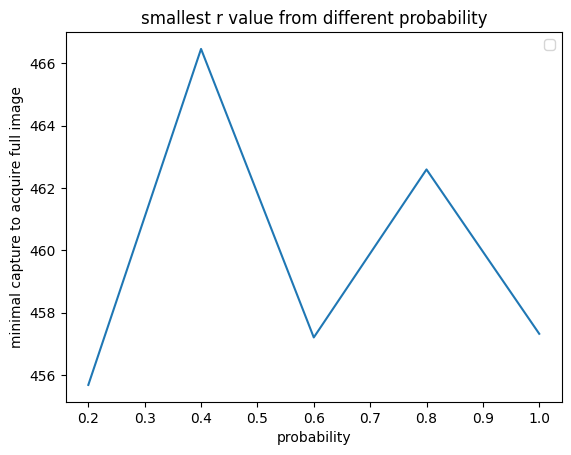

In [ ]:

# 1f) plotting a sharp drop off of the binary_search_norm, r* = 460

r_star = 460
plot_list = []
x_range = [0.2, 0.4, 0.6, 0.8, 1.0]
print(x_range)

for i in range(len(x_range)):
  plot = average_r_star(x_range[i])
  # plot = np.linalg.norm(x_i - x, ord=1)
  plot_list.append(plot)

plt.plot(x_range, plot_list)
plt.legend()
plt.title("smallest r value from different probability")
plt.xlabel('probability')
plt.ylabel('minimal capture to acquire full image')
plt.show()


In [ ]:
from PIL import Image
from numpy import array
import matplotlib.pyplot as plt

img = array(Image.open("bezos-corrupted.png"), dtype=int)[:,:]
Known = (img > 0).astype(int)


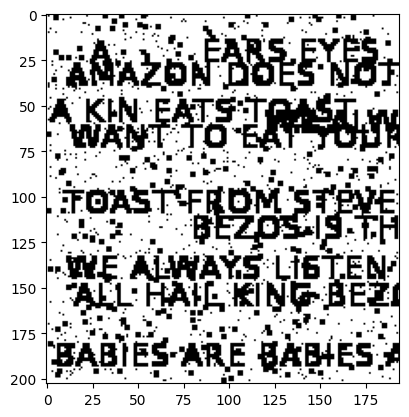

In [ ]:
#diplay known
plt.gray()
plt.imshow(Known)
plt.show()

In [ ]:
# 2a)

def naive_reconstruction(image):
  rows, cols = image.shape
  output = image.copy()
  for row in range(rows):
    for col in range(cols):
      if image[row, col] == 0:
        neighbor_pixels = []
        if row > 0:
          neighbor_pixels.append(image[row - 1, col])
        if row < rows - 1:
          neighbor_pixels.append(image[row+1, col])
        if col > 0:
          neighbor_pixels.append(image[row, col - 1])
        if col < cols - 1:
          neighbor_pixels.append(image[row, col + 1])
        neighbor_pixels = [x for x in neighbor_pixels if x != 0]

        if neighbor_pixels:
          output[row, col] = np.mean(neighbor_pixels)
  return output

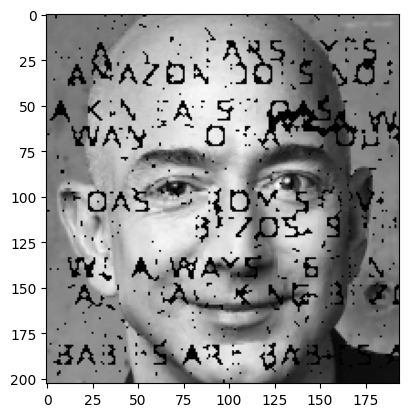

In [ ]:
reconstructed_img = naive_reconstruction(img)
reconstructed_img_pil = Image.fromarray(reconstructed_img.astype('uint8'))

reconstructed_img_pil.save("naive_recovered.png")

plt.imshow(reconstructed_img, cmap='gray')
plt.show()


In [ ]:
def naive2_reconstruction(image):
    rows, cols = image.shape
    output = image.copy()
    for row in range(rows):
        for col in range(cols):
            if image[row, col] == 0:
                neighbor_pixels = []
                for dr in [-1, 0, 1]:
                    for dc in [-1, 0, 1]:
                        if (0 <= row+dr < rows) and (0 <= col+dc < cols) and not (dr == 0 and dc == 0):
                            neighbor_pixels.append(image[row+dr, col+dc])
                neighbor_pixels = [x for x in neighbor_pixels if x != 0]
                if neighbor_pixels:
                    output[row, col] = np.mean(neighbor_pixels)
    return output

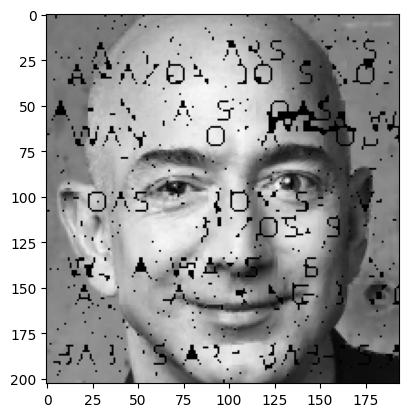

In [ ]:
reconstructed_img = naive2_reconstruction(img)
reconstructed_img_pil = Image.fromarray(reconstructed_img.astype('uint8'))

reconstructed_img_pil.save("naive2_recovered.png")

plt.imshow(reconstructed_img, cmap='gray')
plt.show()

In [ ]:
# 2b
from cvxpy import Variable, Minimize, Problem, multiply, tv

U = Variable(img.shape)
obj = Minimize(tv(U))
constraints = [multiply(Known, U) == multiply(Known, img)]
prob = Problem(obj, constraints)
prob.solve(verbose=True)
# the recovered image is now in U.value

reconstructed_img = U.value

reconstructed_img = np.clip(reconstructed_img, 0, 255)

reconstructed_img_pil = Image.fromarray(reconstructed_img.astype('uint8'))

reconstructed_img_pil.save("reconstructed3_image.png")

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 15 05:07:39 AM: Your problem has 39382 variables, 1 constraints, and 0 parameters.
(CVXPY) May 15 05:07:39 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 15 05:07:39 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 15 05:07:39 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 15 05:07:39 AM: Compiling problem (target solver=ECOS).
(CVXPY) May 15 05:07:39 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing